In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

#### 电影数据

In [2]:
movies = pd.read_table("data/movies.dat", sep="::", header=None)
movies.columns=["movieid", "title", "genres"]
movies = movies.set_index("movieid")
movies["genres"] = movies["genres"].apply(lambda s: s.split("|"))
movies.head()

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,title,genres
movieid,,
1,Toy Story (1995),"[Animation, Children's, Comedy]"
2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
3,Grumpier Old Men (1995),"[Comedy, Romance]"
4,Waiting to Exhale (1995),"[Comedy, Drama]"
5,Father of the Bride Part II (1995),[Comedy]


In [3]:
# 电影数
movies.index.max()

3952

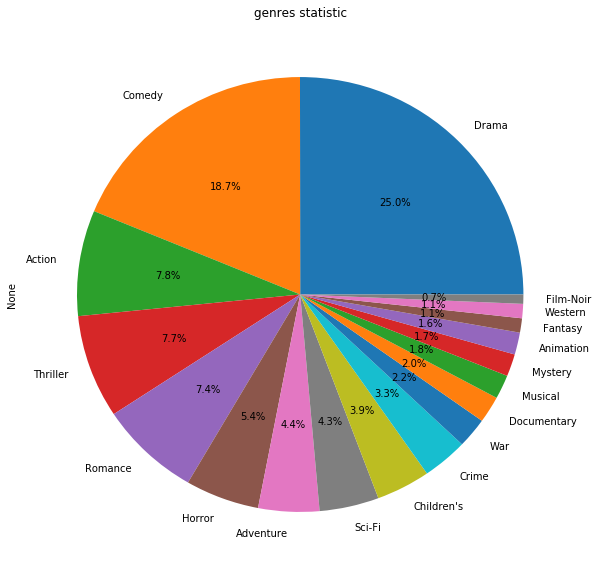

In [33]:
# 电影类别数
genres = []
for g in movies["genres"]:
    genres += g
pd.Series(genres).value_counts().plot(kind="pie", figsize=(10, 10), autopct='%.1f%%', title="genres statistic")
plt.show()

#### 用户数据

In [30]:
users = pd.read_table("data/users.dat", sep="::", header=None)
users.columns=["userid", "gender", "age", "occupation", "Zip-code"]
users = users.set_index("userid")
users.head()

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,gender,age,occupation,Zip-code
userid,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


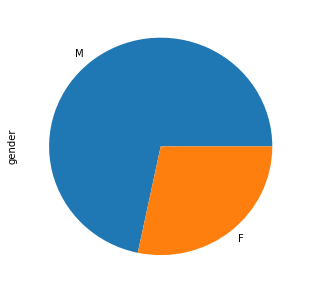

In [34]:
users["gender"].value_counts().plot(kind="pie", figsize=(5,5))
plt.show()

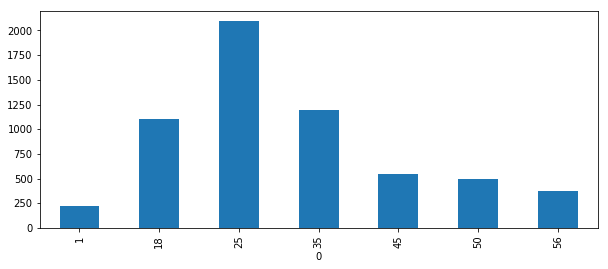

In [76]:
ages = users["age"].value_counts()
ages = list(zip(ages.index, ages.values))
ages.sort()
df = pd.DataFrame(ages)
df = df.set_index(0)
df[1].plot(kind="bar", figsize=(10,4), use_index=True, )
plt.show()

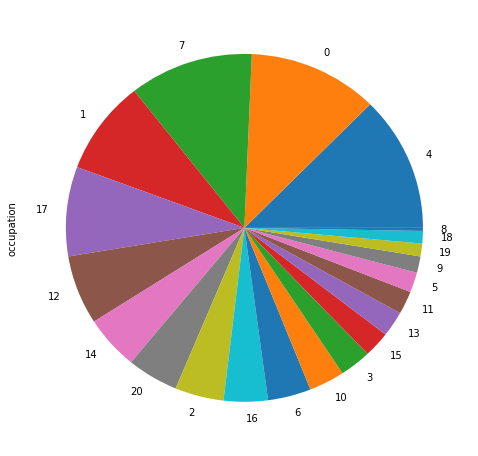

In [79]:
users["occupation"].value_counts().plot(kind="pie", figsize=(8, 8))
plt.show()

#### 读取评分数据

In [32]:
ratings = pd.read_table("data/ratings.dat", sep="::", header=None)
ratings.columns=["userid", "movieid", "rating", "timestamp"]
ratings.head()

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [49]:
matrix = np.zeros((users.index.max(), movies.index.max()), dtype=np.int8)
for i in ratings.index:
    x = ratings.iloc[i]["userid"] - 1
    y = ratings.iloc[i]["movieid"] - 1
    matrix[x, y] = ratings.iloc[i]["rating"]

In [56]:
np.save("matrix.npy", matrix)